In [1]:
# Importing the required libraries
import pandas as pd, numpy as np
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline

In [2]:
# Reading the csv file and putting it into 'df' object.
df = pd.read_csv('heart_v2.csv')

In [3]:
df.columns

Index(['age', 'sex', 'BP', 'cholestrol', 'heart disease'], dtype='object')

In [4]:
df.head()

age  sex   BP  cholestrol  heart disease
0   70    1  130         322              1
1   67    0  115         564              0
2   57    1  124         261              1
3   64    1  128         263              0
4   74    0  120         269              0

In [5]:
df['heart disease'].value_counts()

0    150
1    120
Name: heart disease, dtype: int64

In [6]:
# Putting feature variable to X
X = df.drop('heart disease',axis=1)

# Putting response variable to y
y = df['heart disease']

In [7]:
from sklearn.model_selection import train_test_split

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=42)
X_train.shape, X_test.shape

((189, 4), (81, 4))

Fitting the decision tree with default hyperparameters, apart from max_depth which is 3 so that we can plot and read the tree.

In [9]:
from sklearn.tree import DecisionTreeClassifier

In [10]:
dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [11]:
!pip install six

In [12]:
conda install pydotplus


Note: you may need to restart the kernel to use updated packages.



ConfigurationLoadError: Unable to load configuration file.
  path: C:\Users\user\.condarc
  reason: invalid yaml at position 0



In [13]:
conda install graphviz


Note: you may need to restart the kernel to use updated packages.



ConfigurationLoadError: Unable to load configuration file.
  path: C:\Users\user\.condarc
  reason: invalid yaml at position 0



In [14]:
# Importing required packages for visualization
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [15]:
import os
os.environ["PATH"] += os.pathsep + 'C:\Program Files (x86)\Graphviz2.38/bin/'

In [16]:
# plotting tree with max_depth=3
dot_data = StringIO()  

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X.columns, 
                class_names=['No Disease', "Disease"])

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())
#Image(graph.create_png(),width=800,height=900)
#graph.write_pdf("dt_heartdisease.pdf")

InvocationException: GraphViz's executables not found

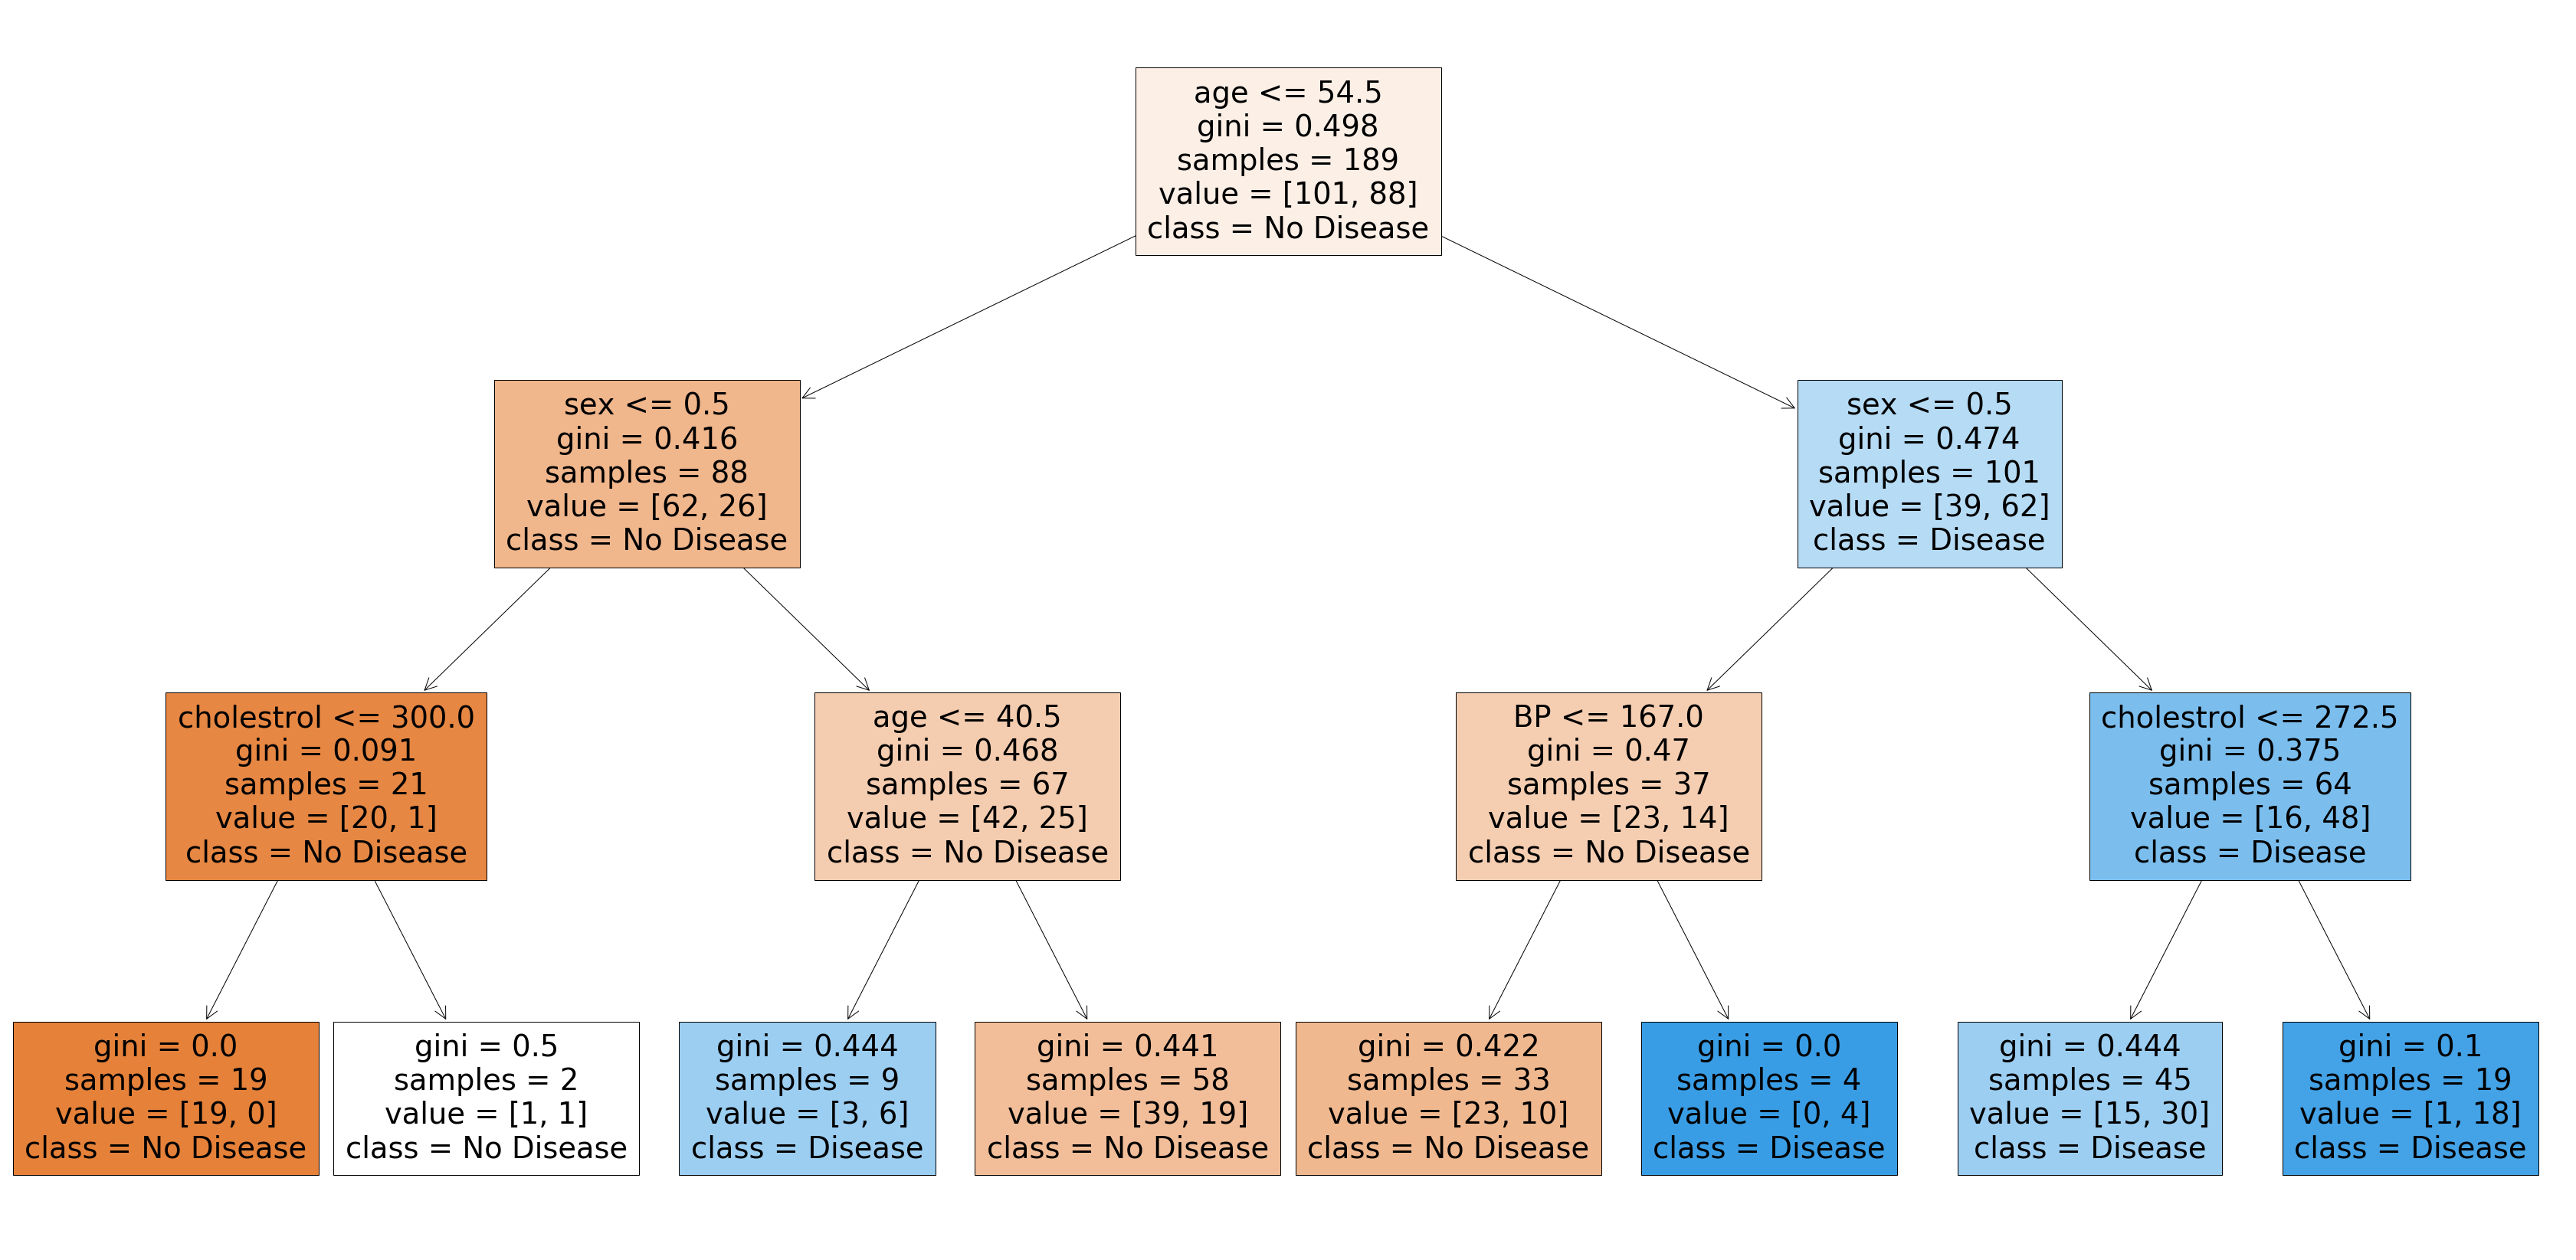

In [17]:
from sklearn.tree import plot_tree
plt.figure(figsize=(60,30))
plot_tree(dt, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);

#### Evaluating model performance

In [18]:
y_train_pred = dt.predict(X_train)
y_test_pred = dt.predict(X_test)

In [19]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [20]:
print(accuracy_score(y_train, y_train_pred))
confusion_matrix(y_train, y_train_pred)

0.7407407407407407


array([[82, 19],
       [30, 58]], dtype=int64)

In [21]:
print(accuracy_score(y_test, y_test_pred))
confusion_matrix(y_test, y_test_pred)

0.6049382716049383


array([[35, 14],
       [18, 14]], dtype=int64)

Create helper functions to evaluate the model performance and create the graph for DT

In [40]:
def get_dt_graph(dt_classifier):
    from sklearn.tree import plot_tree
    plt.figure(figsize=(60,30))
    graph=plot_tree(dt_classifier, feature_names = X.columns,class_names=['No Disease', "Disease"],filled=True);
    
    return graph

In [41]:
def evaluate_model(dt_classifier):
    y_train_pred = dt_classifier.predict(X_train)
    y_test_pred = dt_classifier.predict(X_test)
    print("Train set performance")
    print(accuracy_score(y_train, y_train_pred))
    print(confusion_matrix(y_train, y_train_pred))
    print('-'*50)
    print("Test set performance")
    print(accuracy_score(y_test, y_test_pred))
    print(confusion_matrix(y_test, y_test_pred))

In [42]:
evaluate_model(dt)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


AttributeError: 'list' object has no attribute 'create_png'

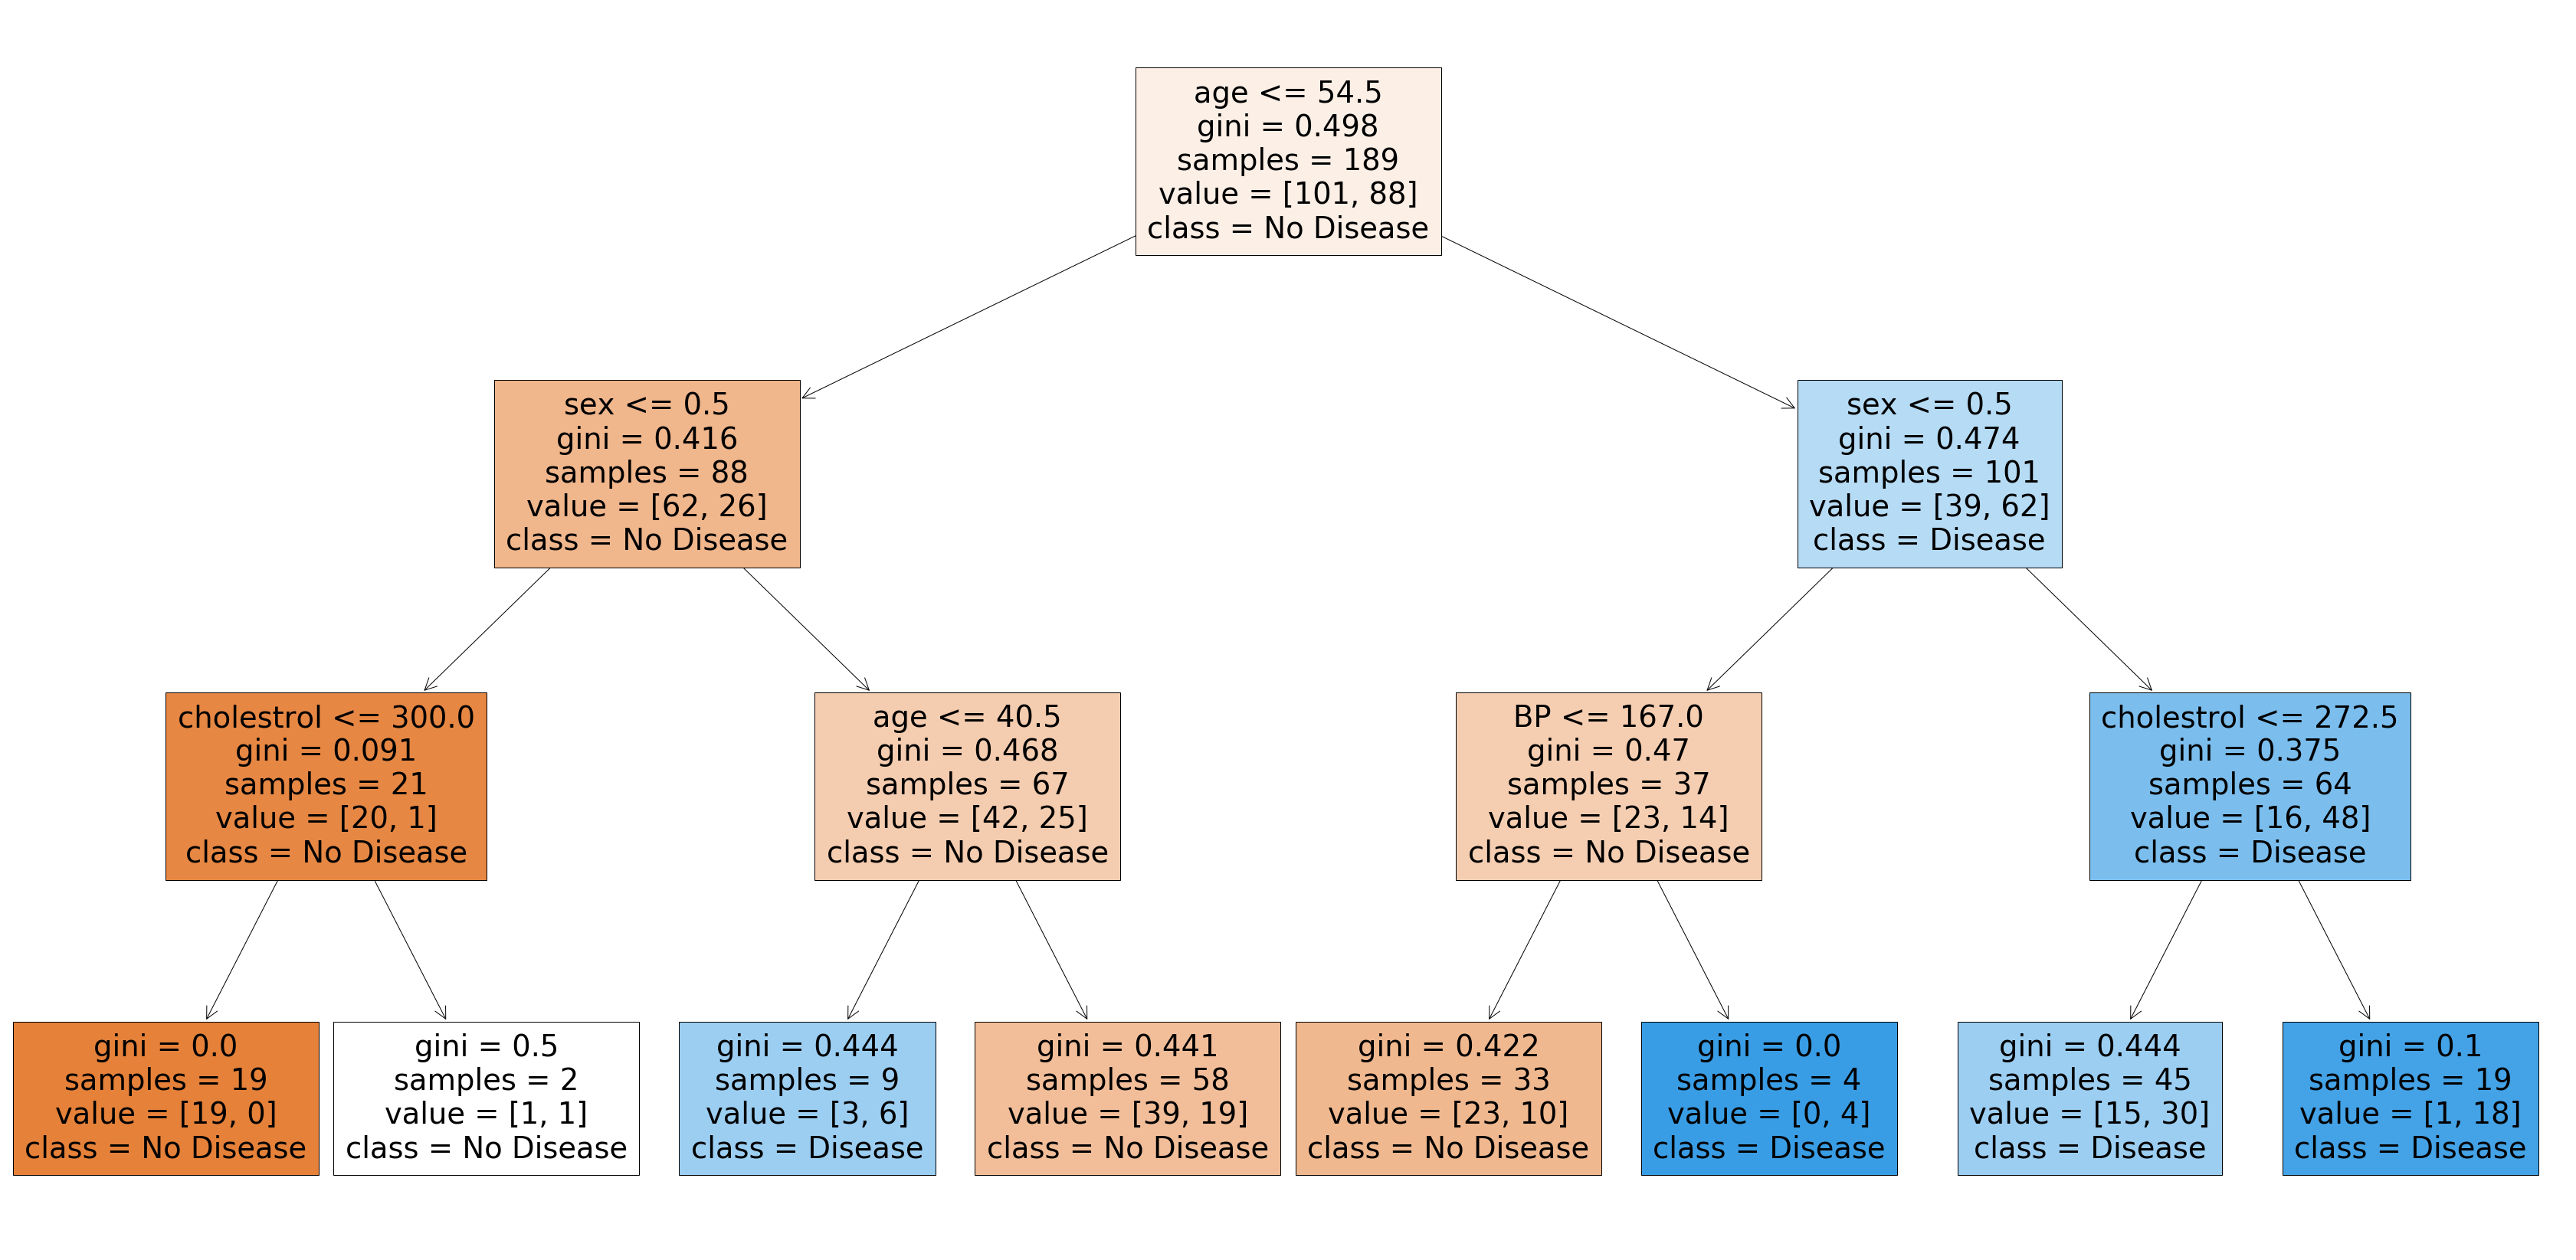

In [44]:
grp = get_dt_graph(dt)
Image(grp.create_png())

Decision tree without any hyperparameter settings

In [45]:
dt_default = DecisionTreeClassifier(random_state=42)
dt_default.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AttributeError: 'list' object has no attribute 'create_png'

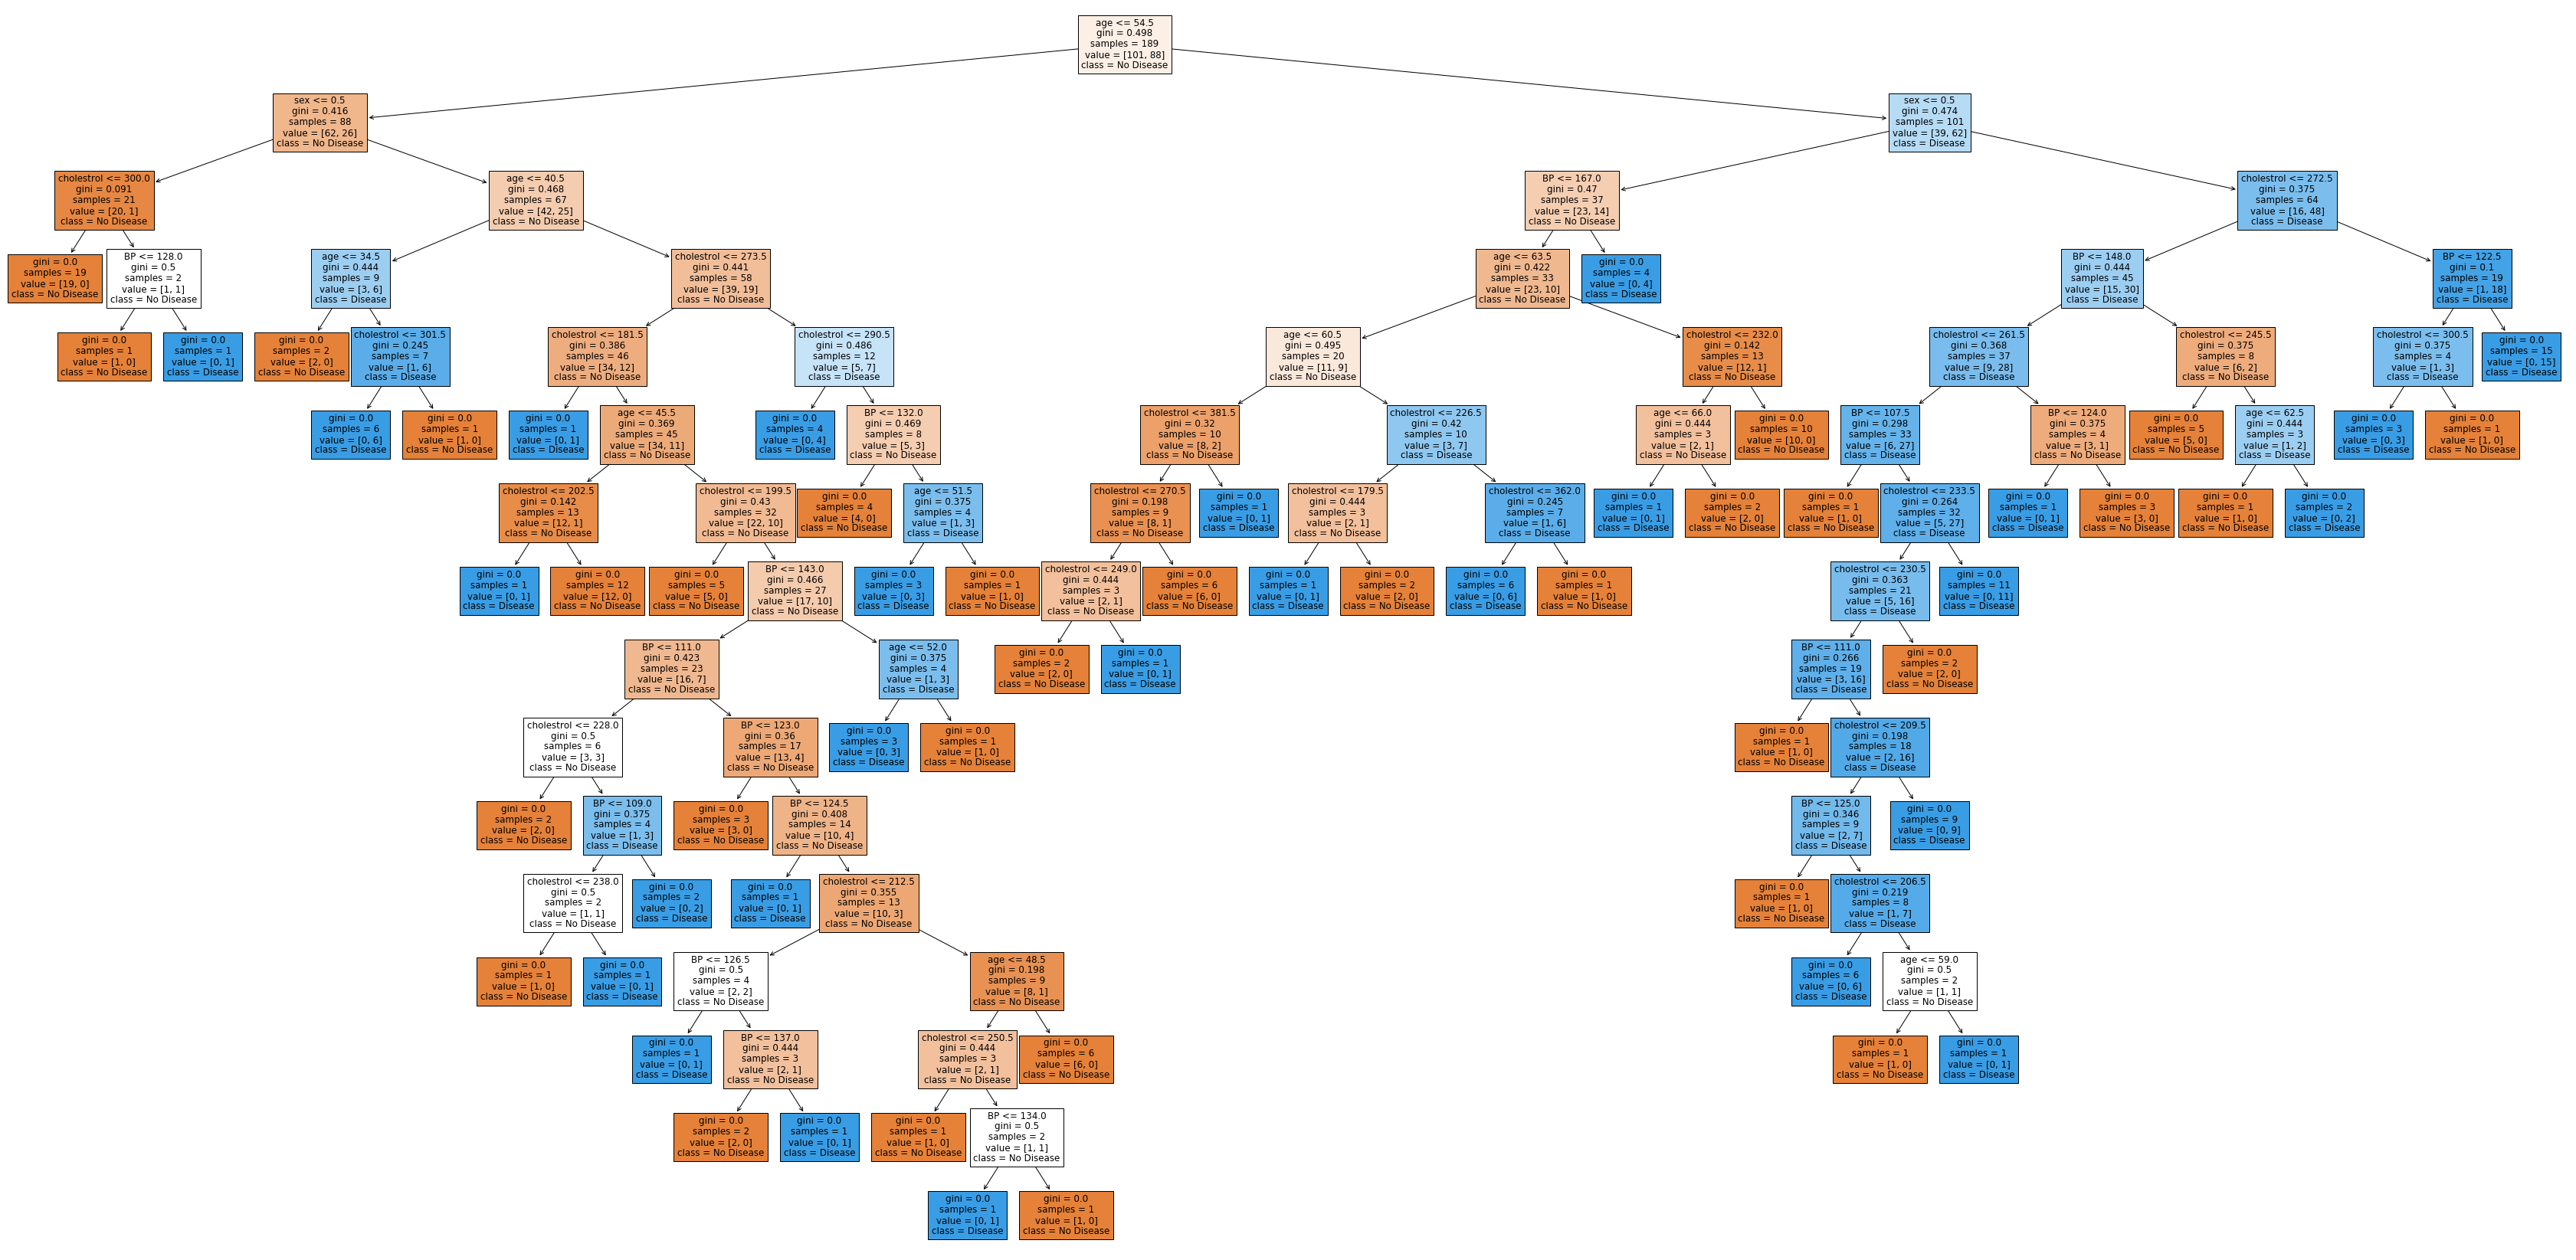

In [46]:
gph = get_dt_graph(dt_default)
Image(gph.create_png())

In [47]:
evaluate_model(dt_default)

Train set performance
1.0
[[101   0]
 [  0  88]]
--------------------------------------------------
Test set performance
0.6296296296296297
[[31 18]
 [12 20]]


Controlling the depth of the tree

In [48]:
dt_depth = DecisionTreeClassifier(max_depth=3, random_state=42)
dt_depth.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AttributeError: 'list' object has no attribute 'create_png'

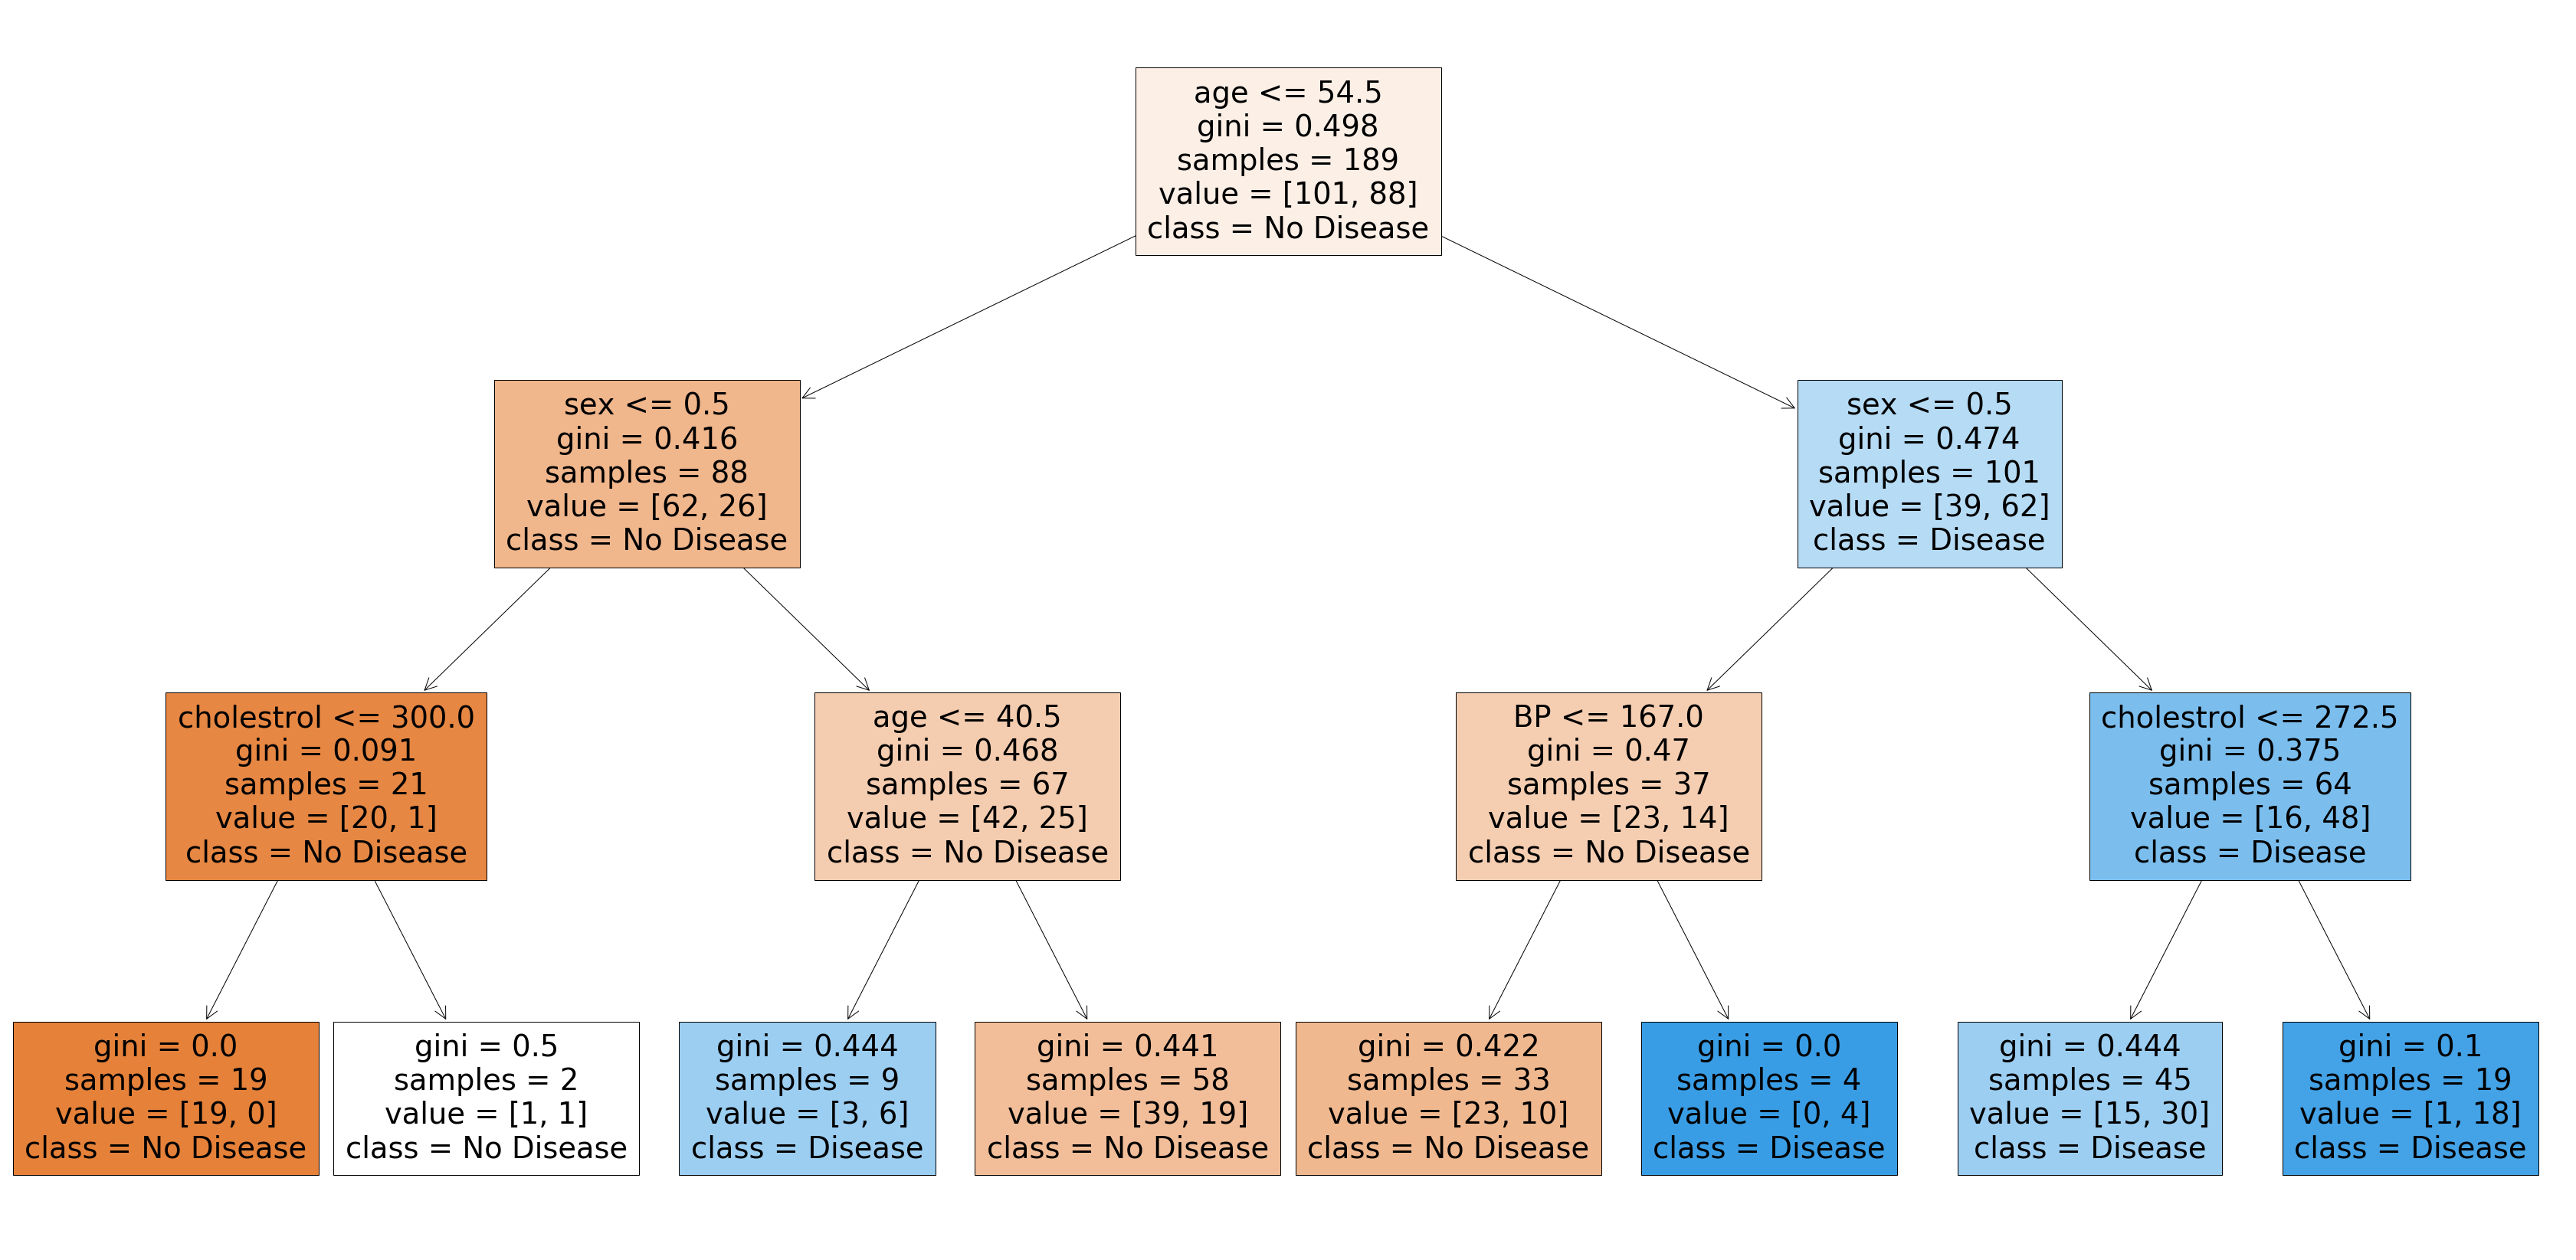

In [49]:
gph = get_dt_graph(dt_depth)
Image(gph.create_png())

In [50]:
evaluate_model(dt_depth)

Train set performance
0.7407407407407407
[[82 19]
 [30 58]]
--------------------------------------------------
Test set performance
0.6049382716049383
[[35 14]
 [18 14]]


Specifying the minimum samples before we split

In [51]:
dt_min_split = DecisionTreeClassifier(min_samples_split=20,random_state=42)
dt_min_split.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=20,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AttributeError: 'list' object has no attribute 'create_png'

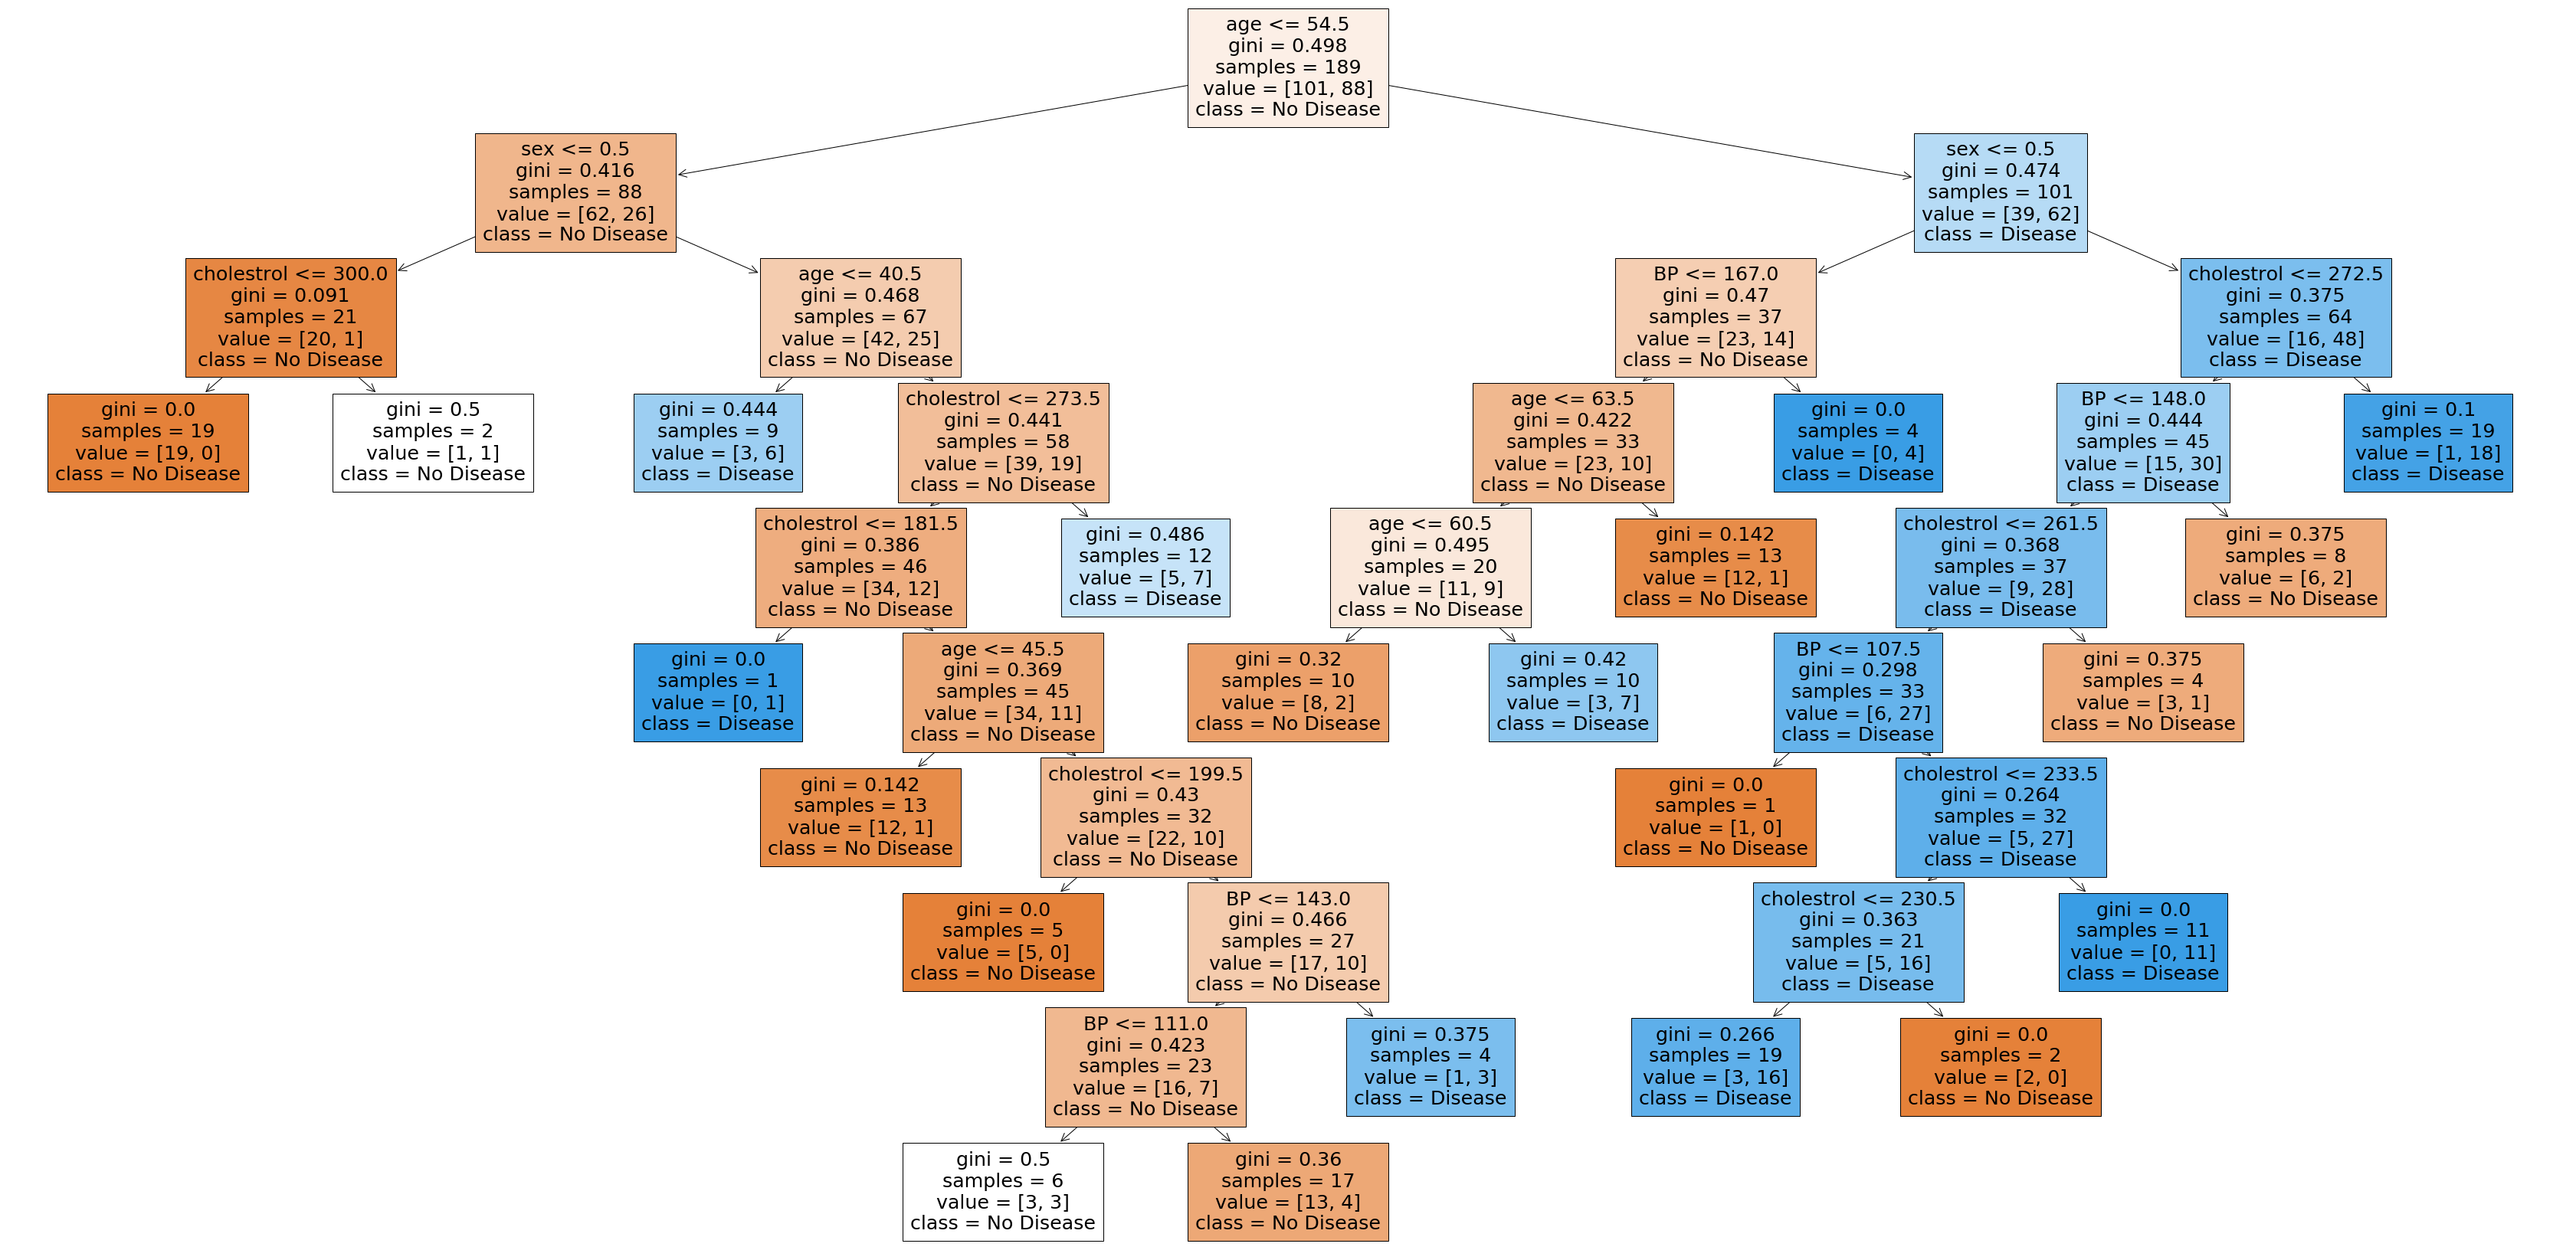

In [52]:
gph = get_dt_graph(dt_min_split)
Image(gph.create_png())

In [53]:
evaluate_model(dt_min_split)

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


Specifying the minimum samples in leaf node

In [55]:
dt_min_leaf = DecisionTreeClassifier(min_samples_leaf=20,random_state=42)
dt_min_leaf.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AttributeError: 'list' object has no attribute 'create_png'

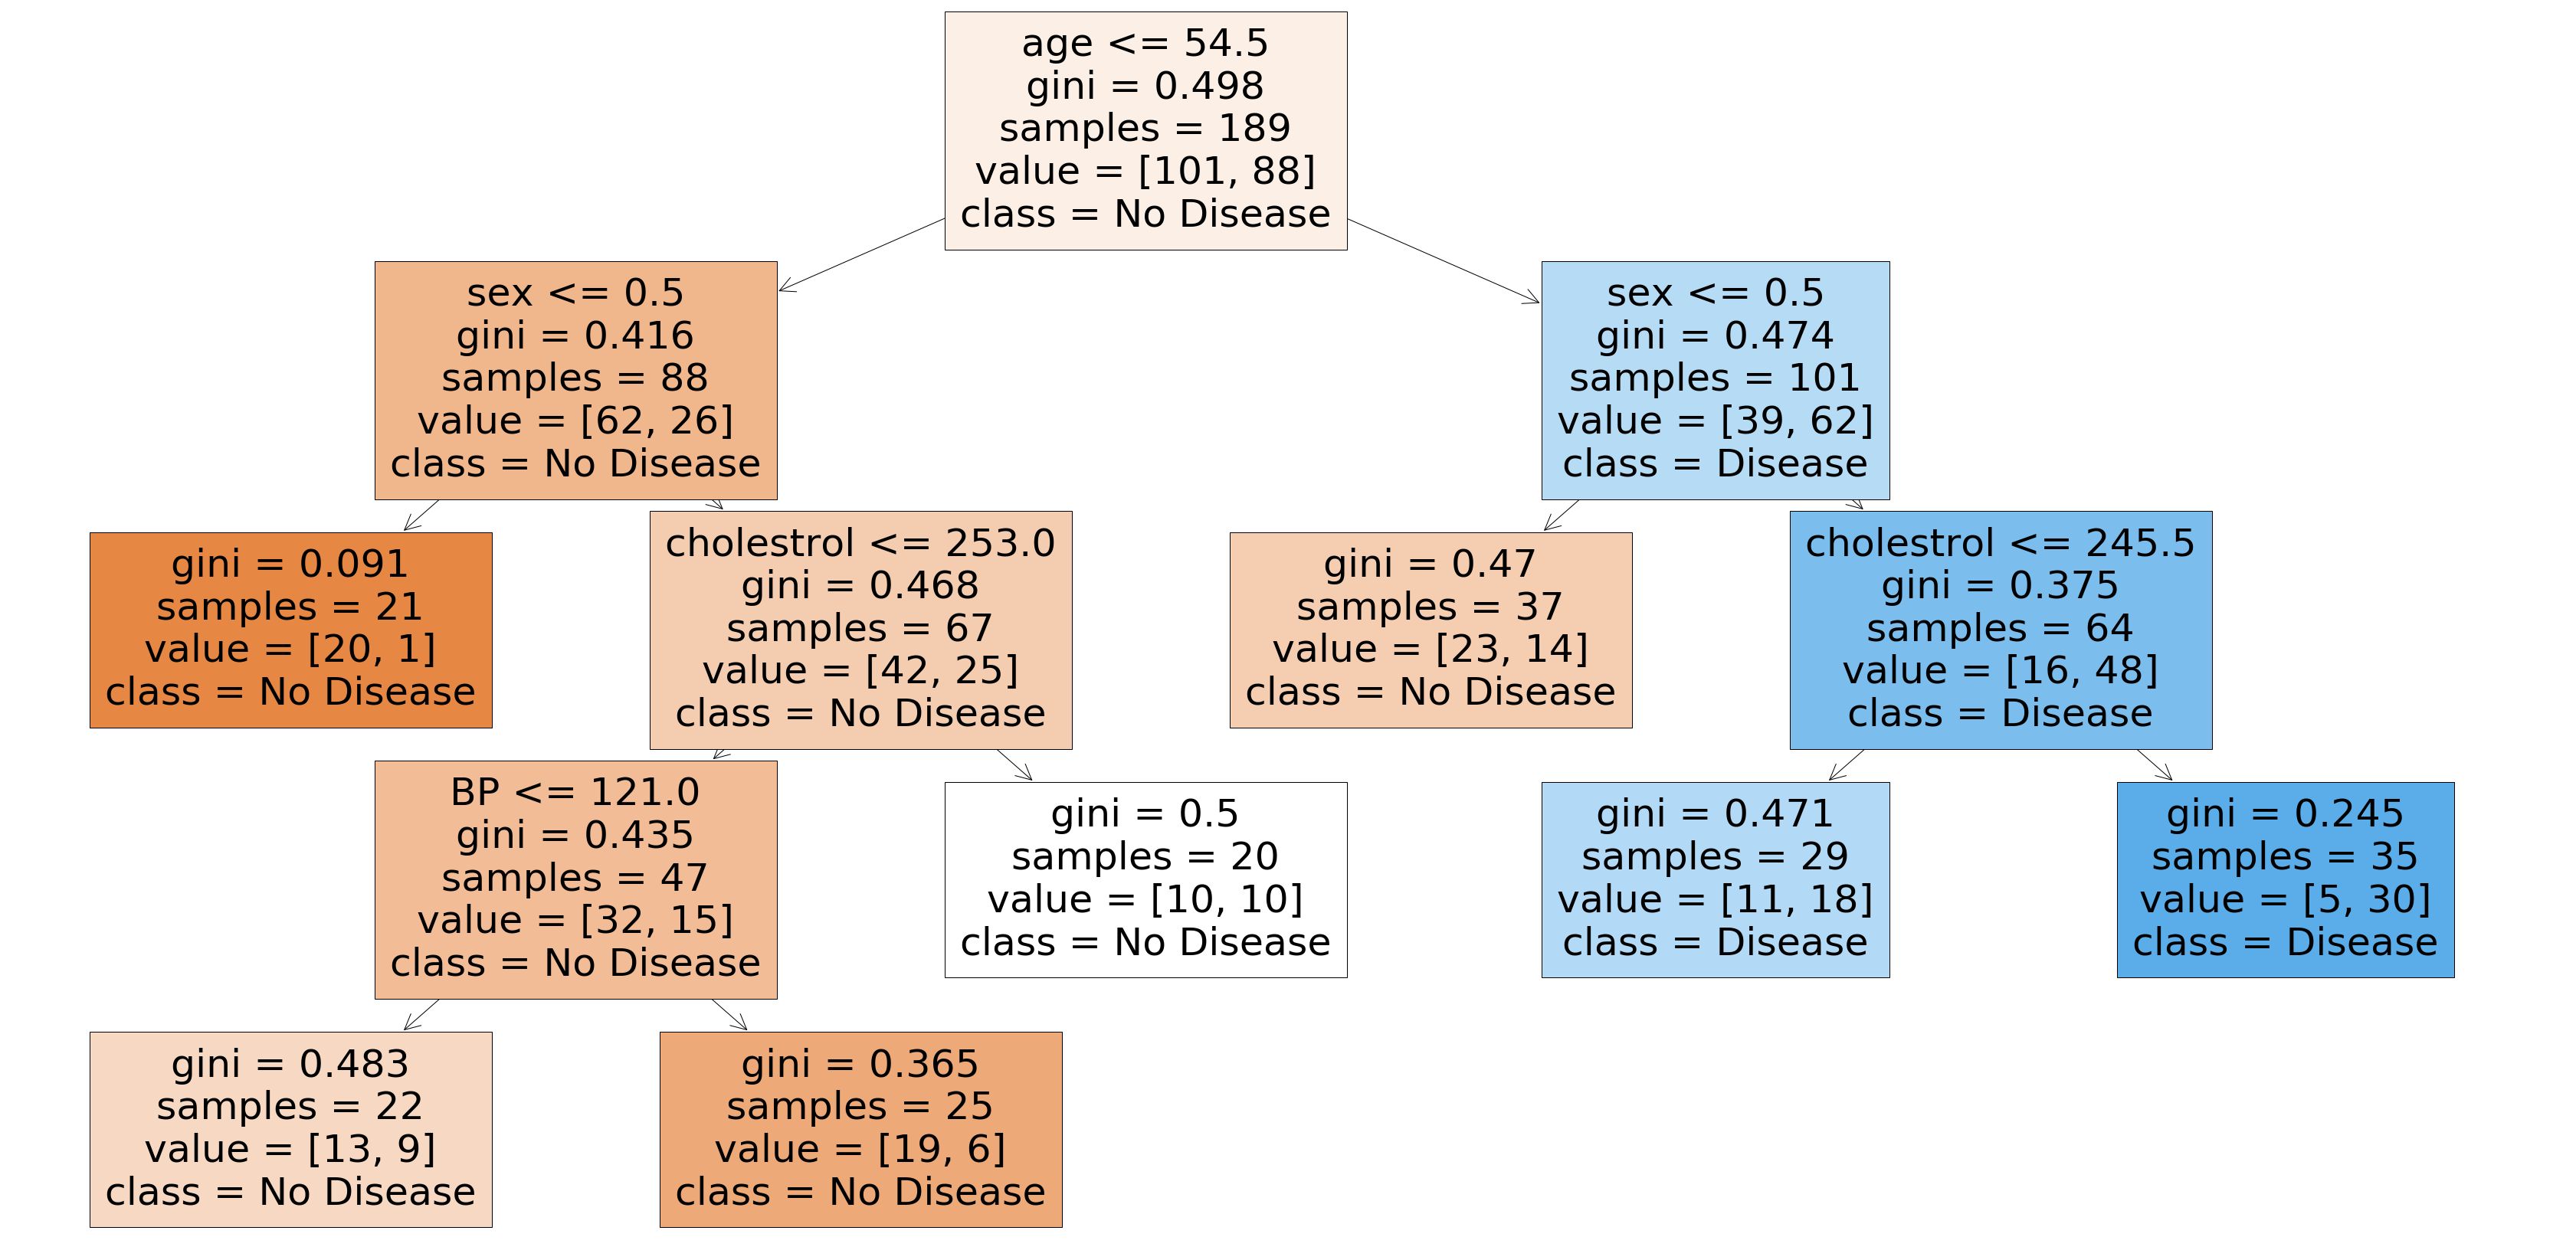

In [56]:
gph = get_dt_graph(dt_min_leaf)
Image(gph.create_png())

In [57]:
evaluate_model(dt_min_split)

Train set performance
0.8359788359788359
[[85 16]
 [15 73]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[32 17]
 [12 20]]


#### Using Entropy instead of Gini 

In [58]:
dt_min_leaf_entropy = DecisionTreeClassifier(min_samples_leaf=20,random_state=42,criterion="entropy")
dt_min_leaf_entropy.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=20, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

AttributeError: 'list' object has no attribute 'create_png'

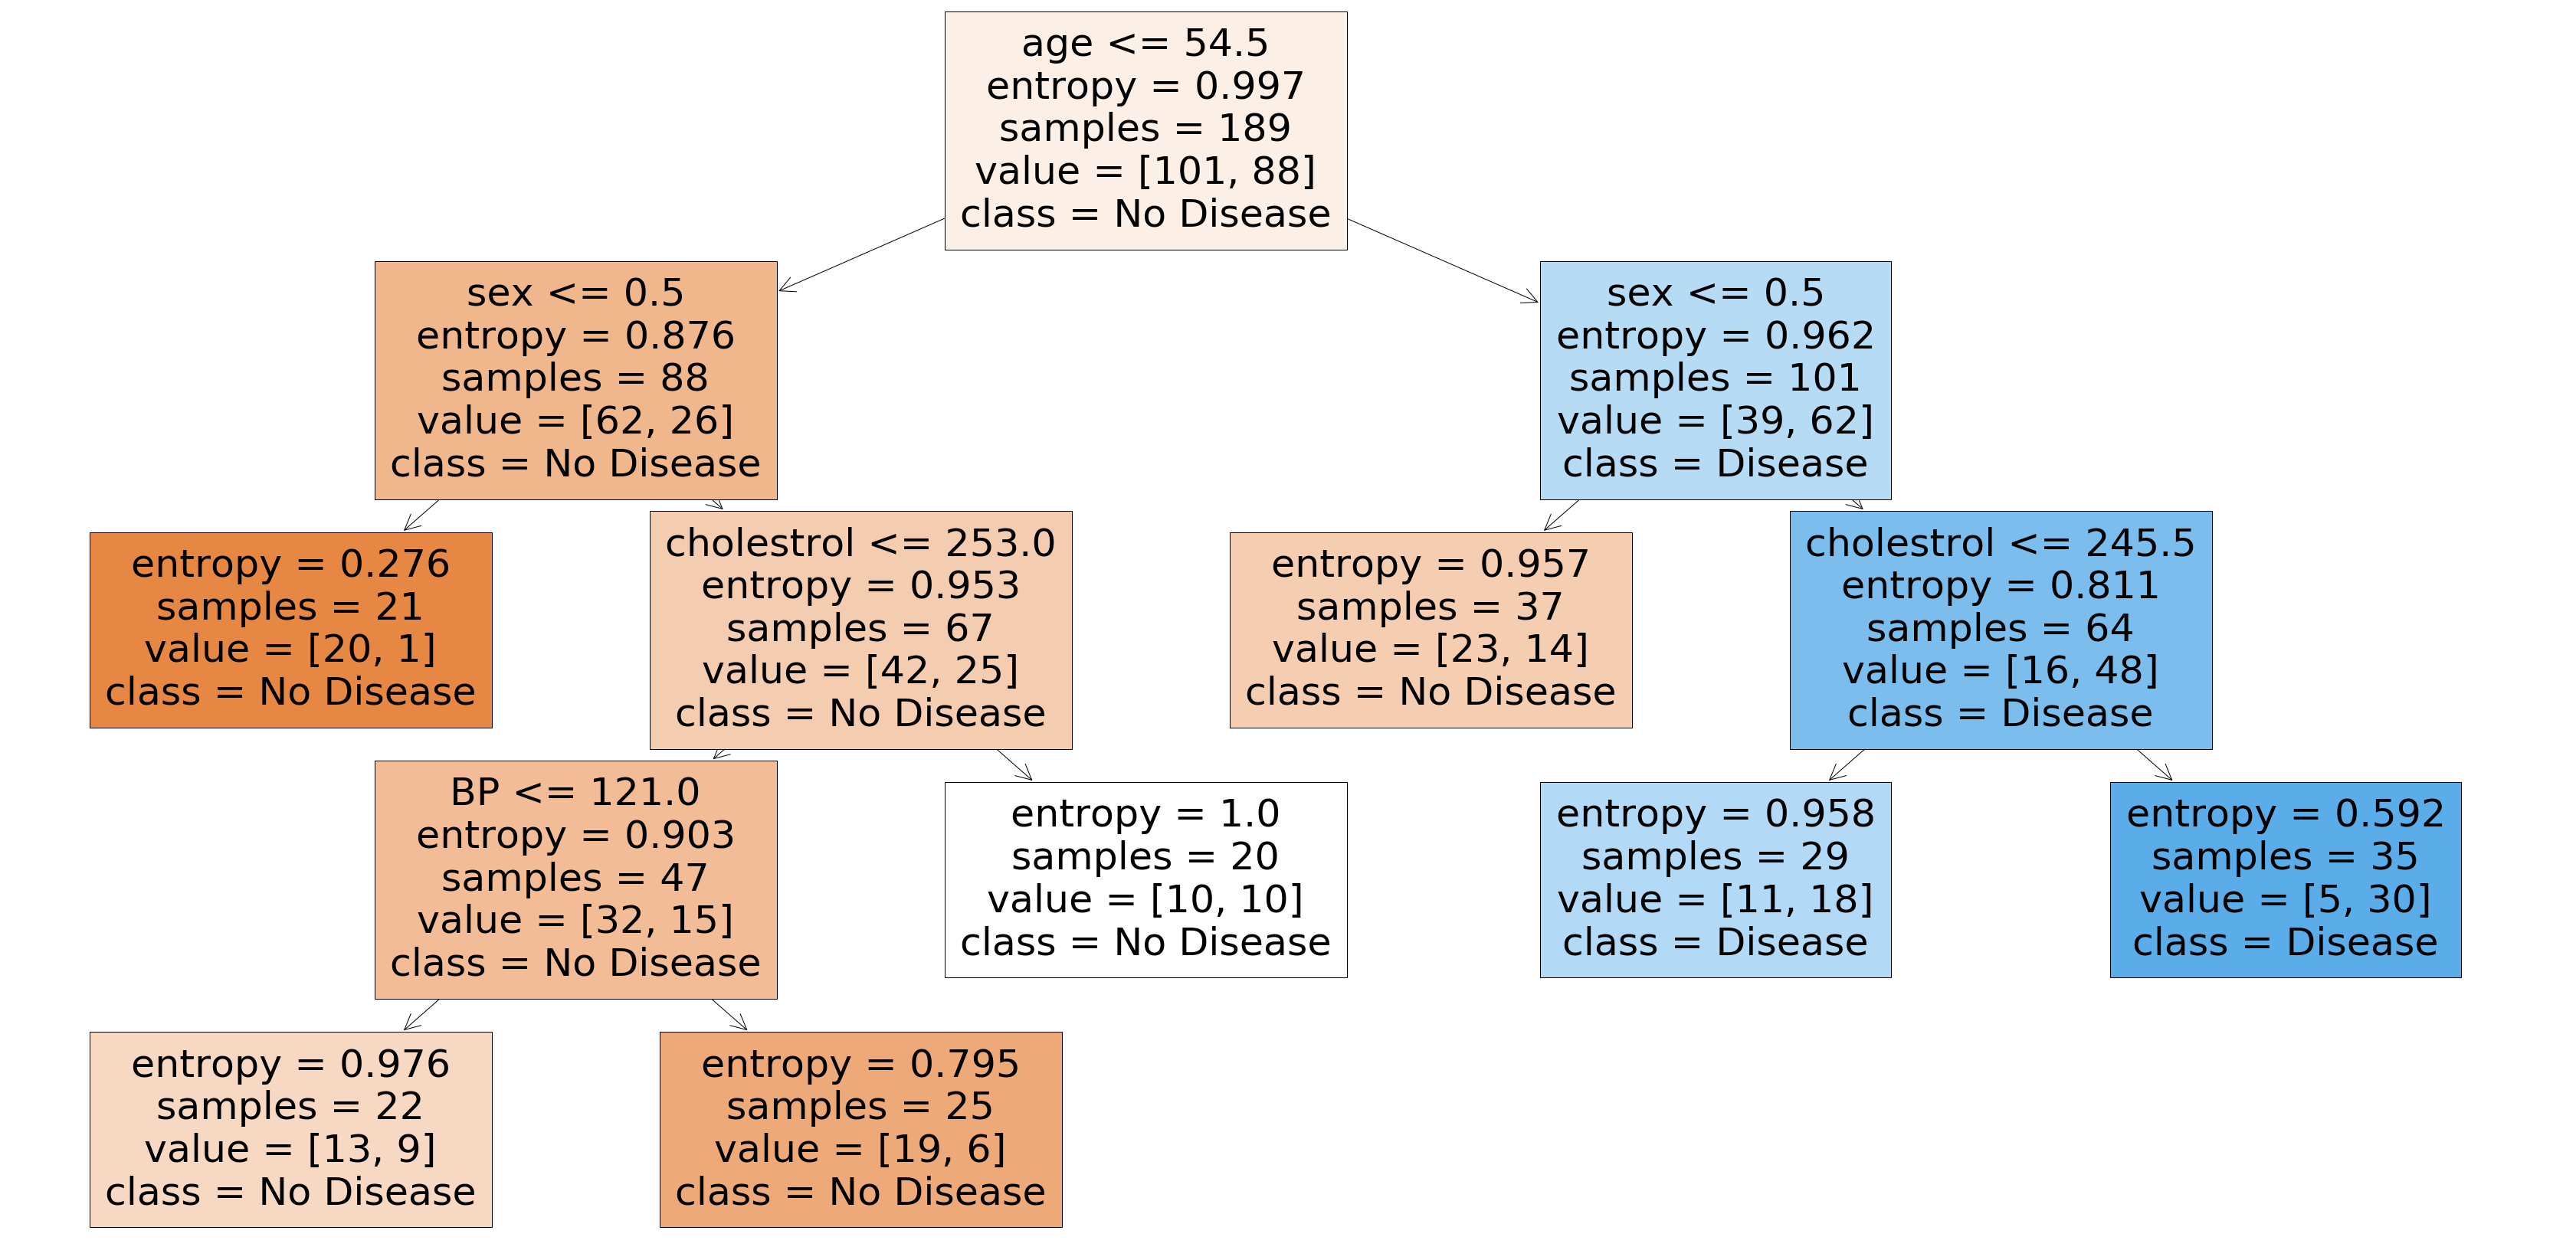

In [59]:
gph = get_dt_graph(dt_min_leaf_entropy)
Image(gph.create_png())

In [60]:
evaluate_model(dt_min_leaf_entropy)

Train set performance
0.7037037037037037
[[85 16]
 [40 48]]
--------------------------------------------------
Test set performance
0.6419753086419753
[[38 11]
 [18 14]]


In [61]:
dt = DecisionTreeClassifier(random_state=42)

In [63]:
from sklearn.model_selection import GridSearchCV

In [68]:
params = {
    'max_depth': [2,3,5,10,20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ['gini','entropy']
}

In [69]:
grid_search = GridSearchCV(estimator=dt,
            param_grid=params,
            cv=4,
            n_jobs=-1,
            verbose=1,
            scoring="accuracy")

In [70]:
%%time
grid_search.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 200 out of 200 | elapsed:    5.2s finished


Wall time: 5.51 s


GridSearchCV(cv=4, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=42,
                                              splitter='best'),
             iid='deprecated', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                       

In [71]:
cv_df = pd.DataFrame(grid_search.cv_results_)
cv_df

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0        0.106076  5.199699e-03         0.002501    5.007982e-04   
1        0.006254  1.089879e-03         0.002252    4.332585e-04   
2        0.004503  4.998446e-04         0.002251    4.338763e-04   
3        0.004503  5.013348e-04         0.002252    4.329131e-04   
4        0.005504  5.006793e-04         0.002001    2.598106e-07   
5        0.005003  1.052828e-06         0.002001    4.578320e-07   
6        0.006005  7.086600e-04         0.002751    8.292402e-04   
7        0.006005  7.083209e-04         0.002501    4.996073e-04   
8        0.005753  1.300149e-03         0.002001    7.348554e-07   
9        0.006007  1.224609e-03         0.003002    1.000762e-03   
10       0.006253  1.088087e-03         0.002252    4.334288e-04   
11       0.005505  1.502792e-03         0.002502    5.006198e-04   
12       0.006502  1.501920e-03         0.002504    8.680970e-04   
13       0.005505  8.626271e-04         0.002750    8.310949e-04   
14       0.005504  1.119610e-03         0.002753    8.297637e-04   
15       0.006005  7.087417e-04         0.002251    4.313645e-04   
16       0.005253  1.089741e-03         0.002252    4.331200e-04   
17       0.004754  4.331190e-04         0.002000    7.073085e-04   
18       0.004755  4.338543e-04         0.002001    7.070557e-04   
19       0.005005  1.228503e-03         0.002502    8.670297e-04   
20       0.005254  1.641206e-03         0.001752    8.308584e-04   
21       0.004754  8.276815e-04         0.001501    5.009184e-04   
22       0.004754  1.301009e-03         0.002251    4.325000e-04   
23       0.005004  4.578320e-07         0.001751    4.336696e-04   
24       0.005003  1.731237e-03         0.002001    8.492355e-07   
25       0.005754  1.299942e-03         0.002002    7.539457e-07   
26       0.005004  1.016779e-06         0.002001    7.027284e-07   
27       0.006754  3.033244e-03         0.001752    4.333943e-04   
28       0.004753  4.337730e-04         0.002252    4.337386e-04   
29       0.004754  8.304804e-04         0.002251    4.338080e-04   
30       0.005254  4.333952e-04         0.002001    8.429370e-07   
31       0.005504  5.001432e-04         0.002251    4.330849e-04   
32       0.005254  4.336352e-04         0.002001    4.256623e-07   
33       0.006505  2.694645e-03         0.001751    4.329814e-04   
34       0.005004  5.960464e-07         0.002001    5.462856e-07   
35       0.007005  2.346817e-03         0.002001    4.298152e-07   
36       0.005254  4.332916e-04         0.002001    5.161914e-07   
37       0.005754  1.089974e-03         0.002001    7.027284e-07   
38       0.005004  6.391886e-07         0.002001    5.430242e-07   
39       0.005504  1.118993e-03         0.003753    2.488804e-03   
40       0.005254  4.336010e-04         0.002002    2.920019e-07   
41       0.007255  2.490200e-03         0.002002    1.802979e-06   
42       0.006004  1.225922e-03         0.003503    2.600366e-03   
43       0.017018  1.751446e-02         0.012004    9.674145e-03   
44       0.006006  1.226409e-03         0.002500    8.654811e-04   
45       0.024929  3.105501e-02         0.002752    8.295278e-04   
46       0.013785  3.595877e-03         0.004228    2.511188e-03   
47       0.005501  4.979450e-04         0.003005    1.225497e-03   
48       0.005254  1.090685e-03         0.002251    4.331190e-04   
49       0.004503  4.999638e-04         0.002001    5.196212e-07   

   param_criterion param_max_depth param_min_samples_leaf  \
0             gini               2                      5   
1             gini               2                     10   
2             gini               2                     20   
3             gini               2                     50   
4             gini               2                    100   
5             gini               3                      5   
6             gini               3                     10   
7             gini               3             

In [72]:
cv_df.shape

(50, 15)

In [73]:
cv_df.nlargest(5, 'mean_test_score')

mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
30       0.005254      0.000433         0.002001    8.429370e-07   
5        0.005003      0.000001         0.002001    4.578320e-07   
3        0.004503      0.000501         0.002252    4.329131e-04   
8        0.005753      0.001300         0.002001    7.348554e-07   
13       0.005505      0.000863         0.002750    8.310949e-04   

   param_criterion param_max_depth param_min_samples_leaf  \
30         entropy               3                      5   
5             gini               3                      5   
3             gini               2                     50   
8             gini               3                     50   
13            gini               5                     50   

                                               params  split0_test_score  \
30  {'criterion': 'entropy', 'max_depth': 3, 'min_...           0.604167   
5   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.625000   
3   {'criterion': 'gini', 'max_depth': 2, 'min_sam...           0.666667   
8   {'criterion': 'gini', 'max_depth': 3, 'min_sam...           0.666667   
13  {'criterion': 'gini', 'max_depth': 5, 'min_sam...           0.666667   

    split1_test_score  split2_test_score  split3_test_score  mean_test_score  \
30           0.765957           0.617021           0.680851         0.666999   
5            0.744681           0.595745           0.659574         0.656250   
3            0.680851           0.574468           0.702128         0.656028   
8            0.680851           0.574468           0.702128         0.656028   
13           0.680851           0.574468           0.702128         0.656028   

    std_test_score  rank_test_score  
30        0.064090                1  
5         0.055831                2  
3         0.048751                3  
8         0.048751                3  
13        0.048751                3

In [75]:
grid_search.best_score_

0.6669991134751774

In [76]:
grid_search.best_estimator_

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=3, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [77]:
dt_best = grid_search.best_estimator_

In [78]:
evaluate_model(dt_best)

Train set performance
0.7195767195767195
[[82 19]
 [34 54]]
--------------------------------------------------
Test set performance
0.6172839506172839
[[36 13]
 [18 14]]


AttributeError: 'list' object has no attribute 'create_png'

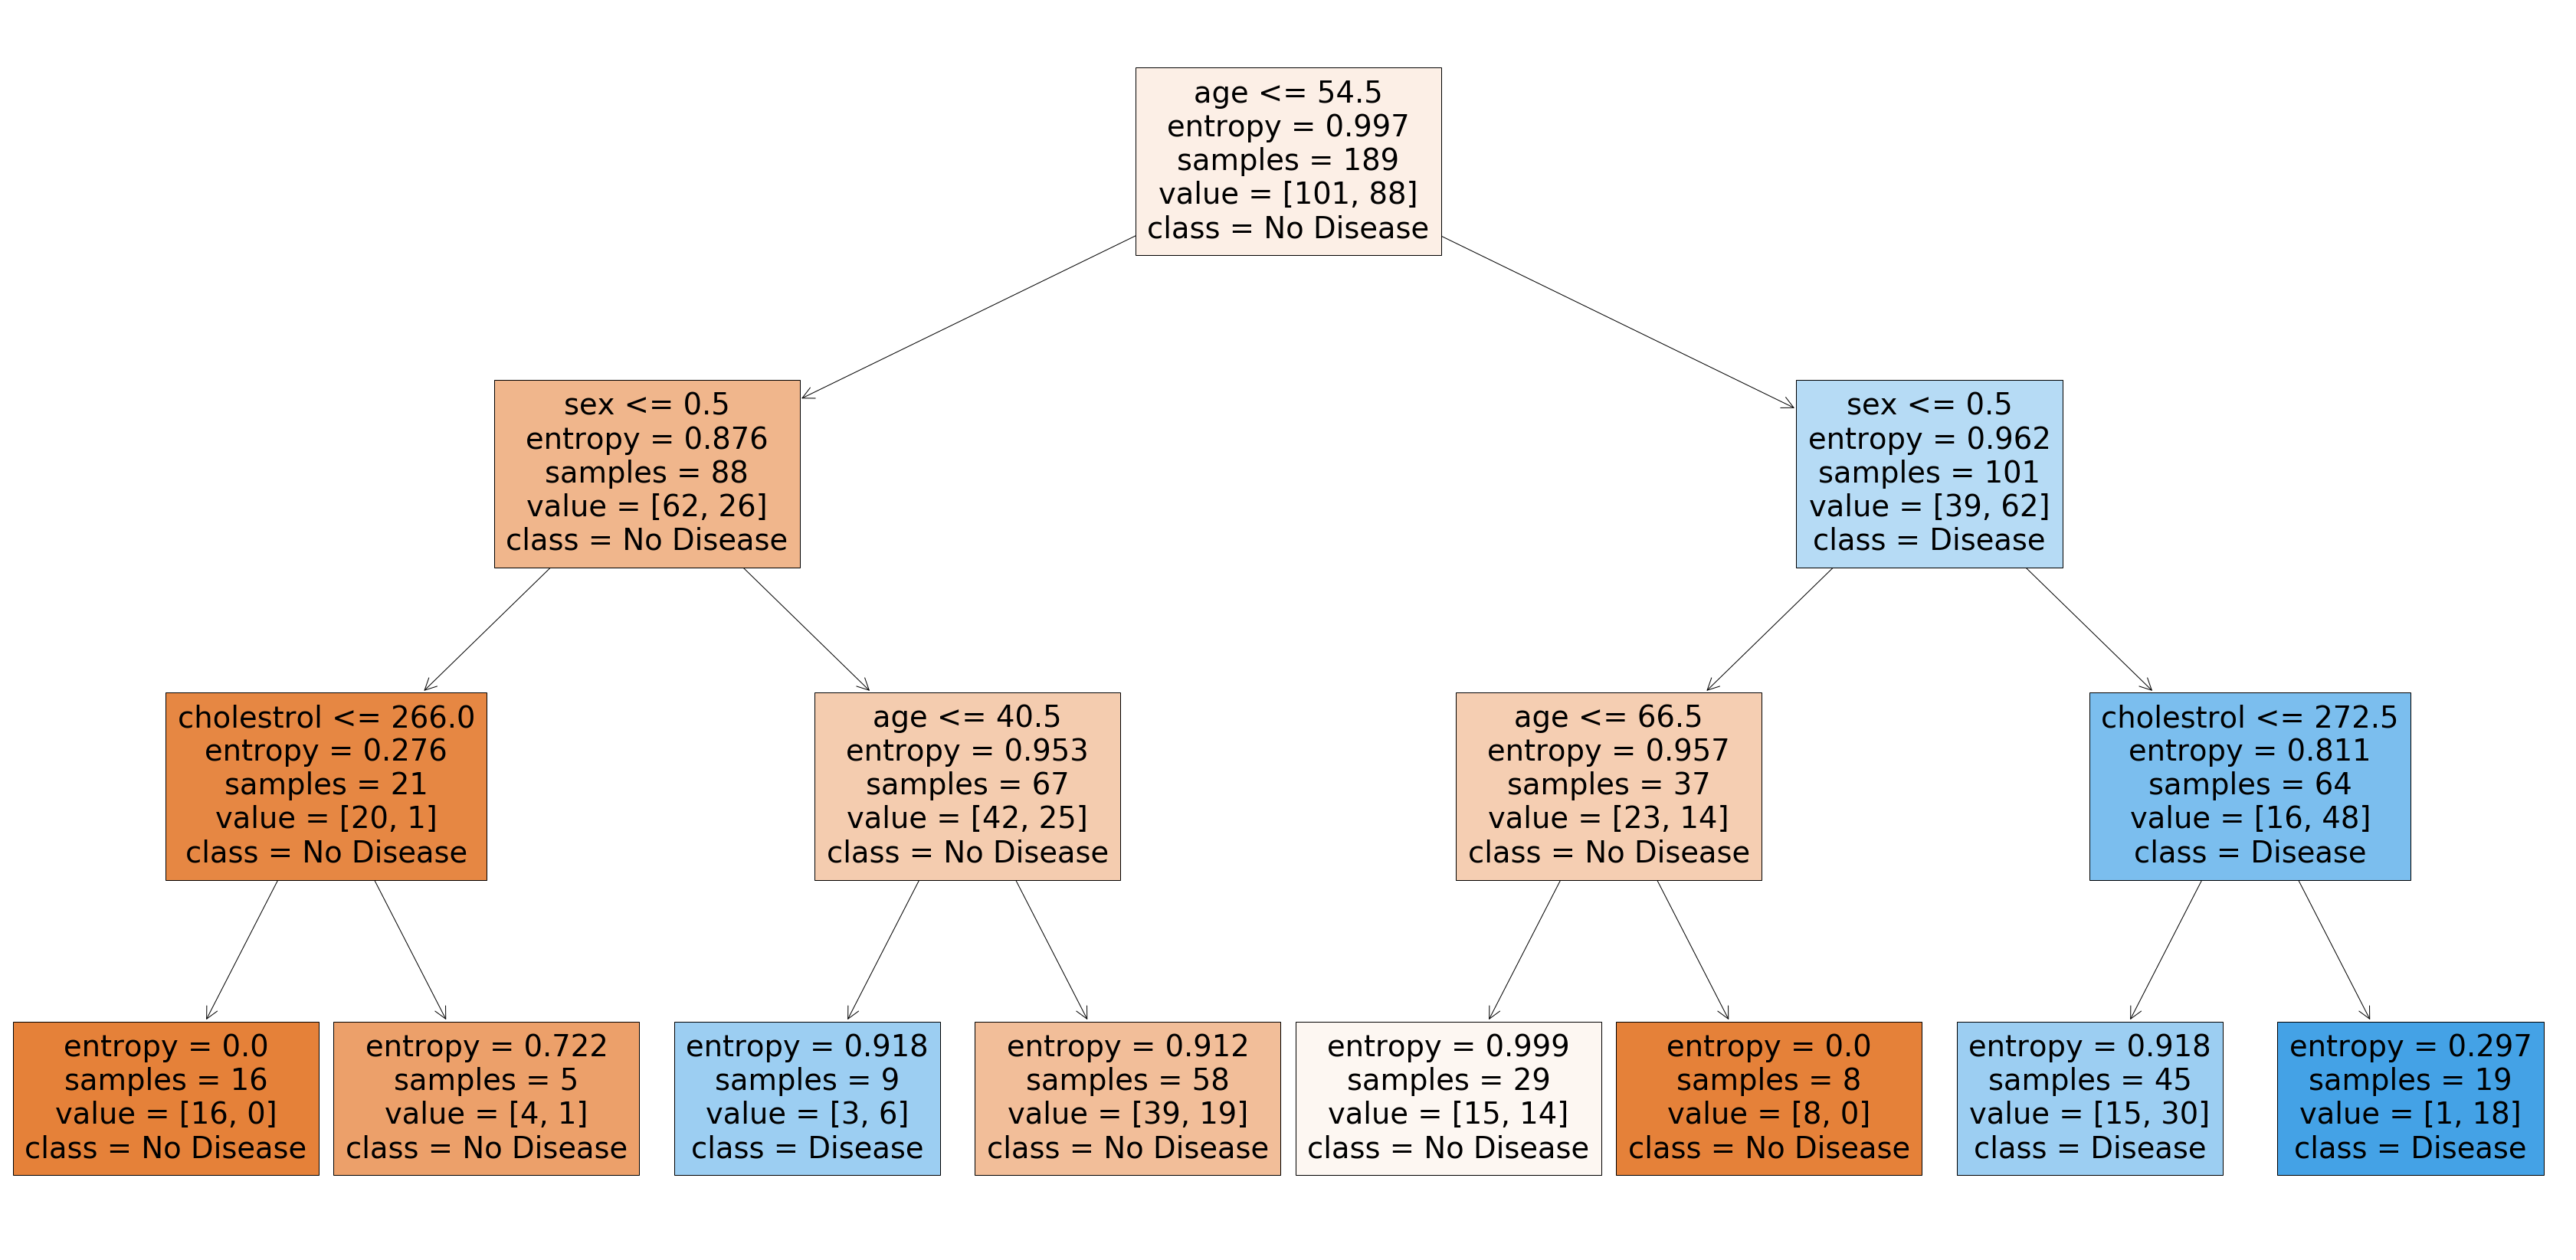

In [79]:
gph = get_dt_graph(dt_best)
Image(gph.create_png())